# 회귀평가지표 ( ANOVA ) 
- 종속변수의 분산과 독립변수의 분산간의 관계 

### MAE ( Mean Absolute Error ) 

### MSE ( Mean Squared Error )

### RMSE ( Root Mean Squared Error 

### $ R^2 $( 결정 계수, 설명력 ) = $ 1 - {{\sum (y_i - \hat y)}^2 \over {\sum (y_i - \bar y)}^2}  = 1 - {\sum (오차^2) \over \sum (편차^2) }$
- 평균값 예측보다 못할 경우 음수 
- 0일 경우 평균값으로 예측

### TSS ( Total Sum of Square) 
**TSS는 종속변수값의 움직이는 범위, 실제 종속변수 값의 $편차^2$ 합**
$$\text{TSS} = \sum_{i=1}^N (y_i-\bar{y})^2 = (y - \bar{y}_N)^T(y - \bar{y}_N)$$

# Linear Regression

회귀분석은 독립변수 $x$에 대응하는 종속변수 $y$와 가장 비슷한 값 $\hat{y}$를 출력하는 함수 $f(x)$를 찾는 과정이다. 

$$ 
\hat{y} = f \left( x \right) \approx y 
$$

만약 $f(x)$가 다음과 같은 선형함수면 이 함수를 **선형회귀모형(linear regression model)**이라고 한다. 선형회귀모형을 사용하는 회귀분석은 선형회귀분석이라고 한다.

$$ 
\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D = w_0 + w^Tx 
$$

위 식에서 독립변수 $x=(x_1, x_2, \ldots, x_D)$는 $D$차원 벡터다. 가중치 벡터 $w=(w_0, \cdots, w_D)$는 함수 $f(x)$의 계수(coefficient)이자 이 선형회귀모형의 **모수(parameter)**라고 한다. 

$ w_0 : Bias ( 편향 ) /  w_1, w_2, w_3, ... w_n : Variance $ 


### OLS (OLS: Ordinary Least Squares)

최소자승법(OLS: Ordinary Least Squares)는 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 구하는 방법이다. 

우리가 사용하는 예측 모형은 다음과 같이 상수항이 결합된 선형모형이다.

$$ \hat{y} = Xw $$

이때 잔차 벡터(residual vector) $e$는 

$$ e = {y} - \hat{y} = y - Xw $$

이고 잔차 제곱합(RSS:residual sum of squares)은

$$
\begin{aligned}
\text{RSS}
&=  e^Te \\
&= (y - Xw)^T(y - Xw) \\
&= y^Ty - 2y^T X w + w^TX^TXw  
\end{aligned}
$$

이다. 잔차의 크기(잔차 제곱합)를 가장 작게 하는 가중치 벡터를 구하기 위해 이 식을 미분하여 잔차 제곱합의 그레디언트(gradient) 벡터를 구하면 다음과 같다.

$$ 
\dfrac{d \text{RSS}}{d w} = -2 X^T y + 2 X^TX w 
$$

잔차가 최소가 되는 최적화 조건은 그레디언트 벡터가 0벡터이어야 하므로 다음 식이 성립한다.

$$ 
\dfrac{d \text{RSS}}{d w} = 0 
$$

$$ 
X^TX w^{\ast} = X^T y 
$$

만약 $X^TX$ 행렬의 역행렬이 존재한다면 다음처럼 최적 가중치 벡터 $w^{\ast}$를 구할 수 있다.

$$ 
w^{\ast} = (X^TX)^{-1} X^T y 
$$

$X^TX$ 행렬의 역행렬이 존재하고 위에서 구한 값이 최저값이 되려면 잔차 제곱합의 헤시안 행렬인 $X^TX$가 양의 정부호(positive definite)이어야 한다.
( 아래로 볼록 )

$$ 
\frac{d^2 \text{RSS}}{dw^2} = 2X^TX > 0 
$$

> $X$의 각 행렬이 서로 독립($X$가 풀랭크)이 아니면 $X^TX$가 양의 정부호가 > 아니고 역행렬이 존재하지 않으므로 위와 같은 해를 구할 수 없다.
> ➤ 각 피쳐들간의 상관관계가 있으면 줄이던가 처리해야함 

# 선형 하강법 ( Gradient Descent )

### __RSS : Residual Sum of Square__ ( 회귀 )

$$ J = Cost(w) = RSS = {1 \over m}{\sum_{i=1}^m}{(Wx^{(i)} - y^{(i)})}^2 $$

### Gradient Descent Algorithm 

$ 1)\quad \hat y = wX $

$ 2)\quad 위의 식에서 W값을 기울기로 취급하고, 기존의 상수 {1 \over m}을 {1 \over 2m}으로 변경하여 미분을 쉽게 해준다 $

$ 3)\quad Cost(w) = RSS = {(wX - y)}{(wX - y)}^t $

$ 4)\quad W\;미분 진행 $

$ 5)\quad w := w - \eta{\partial \over \partial w}cost(w) = w - {\partial \over \partial w}{(wX - y)}{(wX - y)}^t $

$ 6)\quad W := W - ( 2X^tXw - 2X^ty )  $


$ \alpha는\; 수정이\; 반복될\; 때,\; 다음 \; 점을\; 어느정도\; 옮길\; 지\; 결정하는\; 상수 $

$ 최소점\; 0에서\; 우측에\; 점이\; 위치한다면\; 기울기는\; 양수,\; 우측에\; 있다면\; 기울기는\; 음수가\; 된다.\;즉,\;0을\; 기준으로\; 우측에\; 있다면\; 작은\; 곳으로 움직이고,\; 좌측에\; 있다면\; 큰\; 쪽으로\; W를\; 이동시키기\; 위해,\; 음수를\; 곱하여\; 이동시킨다$

$$W := W - \alpha{1 \over m}{\sum_{i=1}^m}{(Wx^{(i)} - y^{(i)})}x^{(i)} $$
$$  W := W - ( 2X^tXw - 2X^ty )  $$
<img src = './img/07_Matrix_공식.jpg' width = '50%' height = '50%'>

# 다중공선성과 VIF 

다중공선성(multicollinearity)란 독립 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우이다. 독립 변수들이 서로 독립이 아니라 상호상관관계가 강한 경우에 발생한다. 이는 독립 변수의 공분산 행렬이 full rank 이어야 한다는 조건을 침해한다.

다음 데이터는 미국의 거시경제지표를 나타낸 것이다. 

* TOTEMP - Total Employment
* GNPDEFL - GNP deflator
* GNP - GNP
* UNEMP - Number of unemployed
* ARMED - Size of armed forces
* POP - Population
* YEAR - Year (1947 - 1962)

스캐터 플롯에서 보듯이 독립변수간의 상관관계가 강하다.

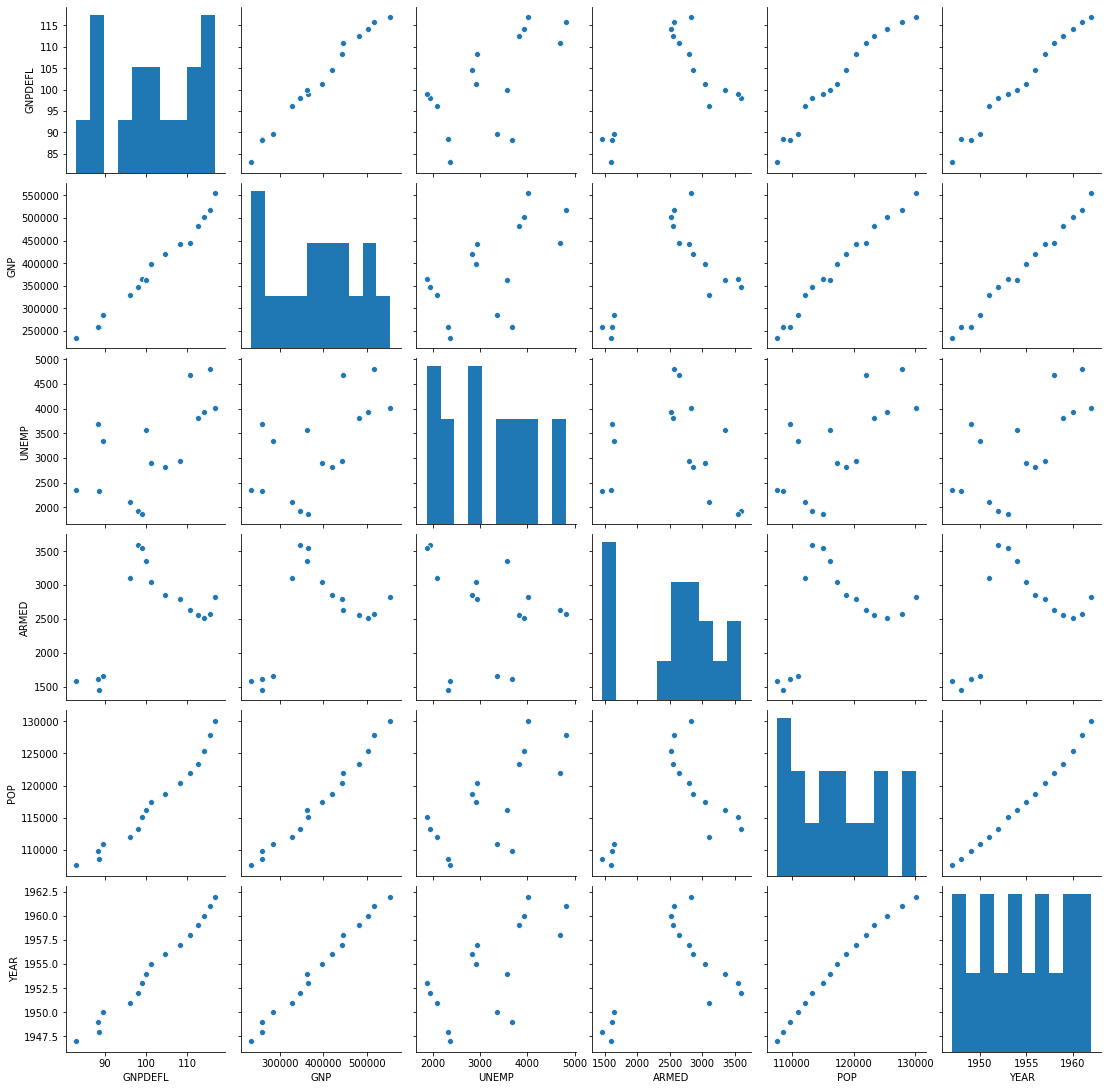

In [7]:
from statsmodels.datasets.longley import load_pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dfy = load_pandas().endog
dfX = load_pandas().exog
df = pd.concat([dfy, dfX], axis=1)
sns.pairplot(dfX)
plt.show()

In [10]:
dfX = load_pandas().exog

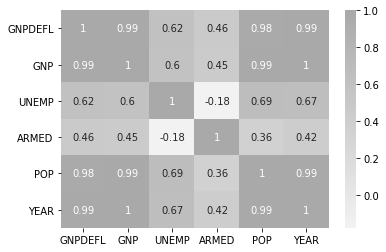

In [11]:
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(dfX.corr(), annot=True, cmap=cmap)
plt.show()

다중 공선성이 있으면 독립변수의 공분산 행렬의 조건수(conditional number)가 증가한다.  

In [14]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

def get_model1(seed):
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("TOTEMP ~ GNPDEFL + POP + GNP + YEAR + ARMED + UNEMP", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     437.5
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0366
Time:                        00:28:02   Log-Likelihood:                -44.199
No. Observations:                   8   AIC:                             102.4
Df Residuals:                       1   BIC:                             103.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.235e+07   2.97e+06     -4.165      0.1

/Users/jaeyeopchung/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


또한 다음처럼 학습용 데이터와 검증용 데이터로 나누어 회귀분석 성능을 비교하면 과최적화가 발생하였음을 알 수 있다.

def calc_r2(df_test, result):
    target = df.loc[df_test.index].TOTEMP
    predict_test = result.predict(df_test)
    RSS = ((predict_test - target)**2).sum()
    TSS = ((target - target.mean())**2).sum()
    return 1 - RSS / TSS


test1 = []
for i in range(10):
    df_train, df_test, result = get_model1(i)
    test1.append(calc_r2(df_test, result))

test1

###### 다중공선성 방지방법 

독립변수가 서로 의존하게 되면 이렇게 과최적화(over-fitting) 문제가 발생하여 회귀 결과의 안정성을 해칠 가능성이 높아진다. 이를 방지하는 방법들은 다음과 같다.

* 변수 선택법으로 의존적인 변수 삭제
* PCA(principal component analysis) 방법으로 의존적인 성분 삭제
* 정규화(regularized) 방법 사용

### VIF 

다중 공선성을 없애는 가장 기본적인 방법은 다른 독립변수에 의존하는 변수를 없애는 것이다. 가장 의존적인 독립변수를 선택하는 방법으로는 VIF(Variance Inflation Factor)를 사용할 수 있다. VIF는 독립변수를 다른 독립변수로 선형회귀한 성능을 나타낸 것이다. $i$번째 변수의 VIF는 다음과 같이 계산한다.

$$ \text{VIF}_i = \frac{\sigma^2}{(n-1)\text{Var}[X_i]}\cdot \frac{1}{1-R_i^2} $$

여기에서 $R^2_i$는 다른 변수로 $i$번째 변수를 선형회귀한 성능(결정 계수)이다. 다른 변수에 의존적일 수록 VIF가 커진다.

StatsModels에서는 `variance_inflation_factor` 명령으로 VIF를 계산한다.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif

,VIF Factor,features
0,12425.514335,GNPDEFL
1,10290.435437,GNP
2,136.224354,UNEMP
3,39.983386,ARMED
4,101193.161993,POP
5,84709.950443,YEAR


상관계수와 VIF를 사용하여 독립 변수를 선택하면 GNP, ARMED, UNEMP 세가지 변수만으로도 비슷한 수준의 성능이 나온다는 것을 알 수 있다.

In [19]:
def get_model2(seed):
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("TOTEMP ~ scale(GNP) + scale(ARMED) + scale(UNEMP)", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result2 = get_model2(3)
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     118.6
Date:                Tue, 21 Jul 2020   Prob (F-statistic):           0.000231
Time:                        00:30:02   Log-Likelihood:                -57.695
No. Observations:                   8   AIC:                             123.4
Df Residuals:                       4   BIC:                             123.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.538e+04    163.988    398.686   

/Users/jaeyeopchung/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


다중공선성을 제거한 경우에는 학습 성능과 검증 성능간의 차이가 줄어들었음을 확인할 수 있다. 즉, 과최적화가 발생하지 않는다.

In [ ]:
test2 = []
for i in range(10):
    df_train, df_test, result = get_model2(i)
    test2.append(calc_r2(df_test, result))

test2

/Users/jaeyeopchung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaeyeopchung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaeyeopchung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaeyeopchung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaeyeopchung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaeyeopchung/opt/anacon

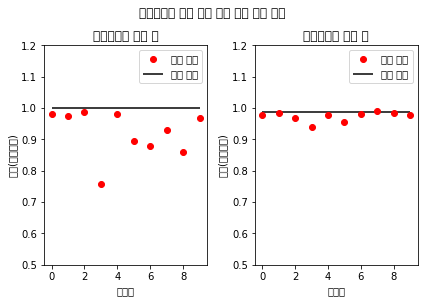

In [21]:
plt.subplot(121)
plt.plot(test1, 'ro', label="검증 성능")
plt.hlines(result1.rsquared, 0, 9, label="학습 성능")
plt.legend()
plt.xlabel("시드값")
plt.ylabel("성능(결정계수)")
plt.title("다중공선성 제거 전")
plt.ylim(0.5, 1.2)

plt.subplot(122)
plt.plot(test2, 'ro', label="검증 성능")
plt.hlines(result2.rsquared, 0, 9, label="학습 성능")
plt.legend()
plt.xlabel("시드값")
plt.ylabel("성능(결정계수)")
plt.title("다중공선성 제거 후")
plt.ylim(0.5, 1.2)

plt.suptitle("다중공선성 제거 전과 제거 후의 성능 비교", y=1.04)
plt.tight_layout()
plt.show()